# Simple linear regression

In this notebook, we take a closer look at simple linear regression

First we import the standard packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

Then we import some example data. In this case Google Analytics webdata about daily users and daily number of purchases in the webshop

In [2]:
webdata = pd.read_excel("GA users and convertions.xlsx")

In [3]:
webdata

,DayIndex,Users,PurchaseCompleted
0,2016-08-01,560,8
1,2016-08-02,378,10
2,2016-08-03,412,11
3,2016-08-04,499,7
4,2016-08-05,375,11
...,...,...,...
87,2016-10-27,351,23
88,2016-10-28,398,23
89,2016-10-29,209,10
90,2016-10-30,224,16


## Visualizing simple linear regression

To visualize the best fitted linear regression line in a scatterplot with Seaborn, we use the function `regplot`.

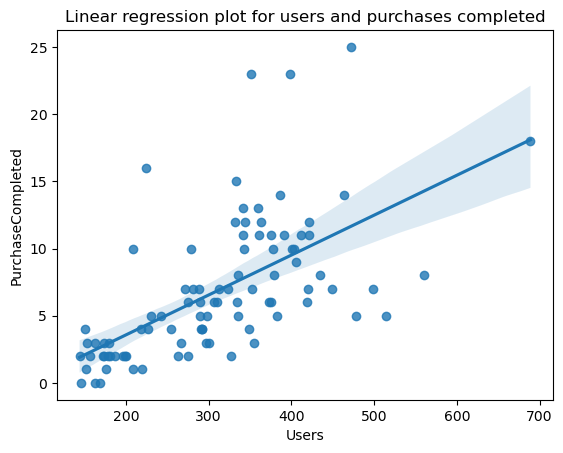

In [4]:
sns.regplot(data = webdata, x = "Users", y = "PurchaseCompleted")
plt.title("Linear regression plot for users and purchases completed")
plt.show()

The shaded area along the regression line is the *confidence interval*, which we will not talk more about for now, but essentially it visualizes the uncertainly associated the regression line. We can remove the confidence interval from our plot if we want:

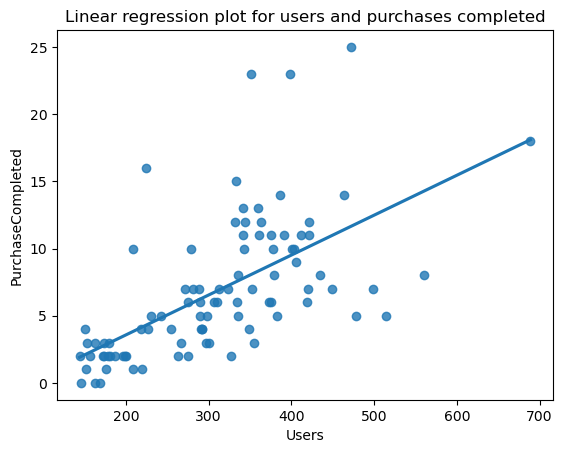

In [5]:
sns.regplot(data = webdata, x = "Users", y = "PurchaseCompleted", ci=None)
plt.title("Linear regression plot for users and purchases completed")
plt.savefig('corrplot_w_regline.png')
plt.show()

## Fitting a simple linear regression model using OLS

We can fit a simple regression line to our data such that the sum of squared errors (residuals) are minimized. We call this approach *"Ordinary Least Squares"* (OLS)

We will first use the [statsmodels](https://www.statsmodels.org/stable/index.html) package to fit a OLS model to our data. See also https://www.statsmodels.org/stable/regression.html

First we import the relevant package

In [6]:
import statsmodels.api as sm

We define our *Users* column to be our X data.

In [7]:
X = webdata["Users"]

In [8]:
X

0     560
1     378
2     412
3     499
4     375
     ... 
87    351
88    398
89    209
90    224
91    472
Name: Users, Length: 92, dtype: int64

Using statsmodels, we have to add the intercept (in the form of a column of 1s)

In [9]:
X = sm.add_constant(X)

In [10]:
X

,const,Users
0,1.0,560
1,1.0,378
2,1.0,412
3,1.0,499
4,1.0,375
...,...,...
87,1.0,351
88,1.0,398
89,1.0,209
90,1.0,224


We then set the *PurchaseCompleted* column to our y.

In [11]:
y = webdata["PurchaseCompleted"]
y

0      8
1     10
2     11
3      7
4     11
      ..
87    23
88    23
89    10
90    16
91    25
Name: PurchaseCompleted, Length: 92, dtype: int64

We can now fit a simple linear regression model using OLS

In [12]:
linreg_model = sm.OLS(y, X).fit()

We can get a lot of information about our model from the summary method.

In [13]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PurchaseCompleted   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     54.80
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           6.81e-11
Time:                        16:56:38   Log-Likelihood:                -258.35
No. Observations:                  92   AIC:                             520.7
Df Residuals:                      90   BIC:                             525.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3670      1.309     -1.808      0.074      -4.968       0.234
Users          0.0297      0.004      7.403      0.000       0.022       0.038
==============================================================================
Omnibus:                       37.103   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.388
Skew:                           1.511   Prob(JB):                     2.12e-18
Kurtosis:                       6.478   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation of the model**

Here we see general information about the model at the top, such as R-squared (0.378) and  Adjusted R-squared (0.372). That is, our model explain 37.8% of the variance in purchases completed by the variance in users.

This is followed by information about each of the coefficients (including the intercept named "const"). The *coef* column is the value for the coefficient found by OLS. The *P>|t|* column give us the p-value associated with that column - if it is less than our significance level, the cofficient is statistically different from 0. This is the most interesting information about the model for now.

We see that for each additional user, we can expect 0.0297 purchases completed, that is for 100 additional users we will expect to see almost 3 purchases completed (100*0.0297). With a p-value of basically 0, we can also conclude that this relationship is indeed statistically significant. The intercept of -2.3670 is not quite significant as the p-values is 0.074, which is above 0.05.

### Retrieving coefficients and plotting fitted regression line

We can also get the parameters or coefficients from the fitted model the following way:

In [14]:
linreg_model.params

const   -2.367030
Users    0.029698
dtype: float64

We can then use that to manually calculate the prediction for each point in webdata:

In [15]:
pred_y = linreg_model.params["const"] + linreg_model.params["Users"]*webdata["Users"]
pred_y

0     14.263597
1      8.858643
2      9.868360
3     12.452047
4      8.769551
        ...    
87     8.056810
88     9.452594
89     3.839758
90     4.285221
91    11.650213
Name: Users, Length: 92, dtype: float64

We can now manually add the OLS regression line to our scatter plot

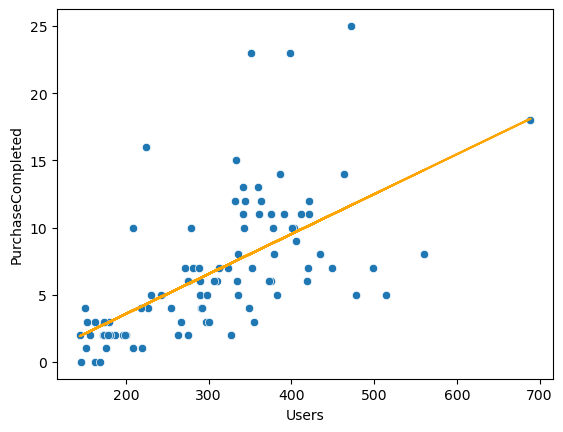

In [16]:
sns.scatterplot(data = webdata, x = "Users", y = "PurchaseCompleted")
plt.plot(webdata["Users"], pred_y, color = "orange")
plt.show()

Which looks the same as the regression plot we got from Seaborns regplot:

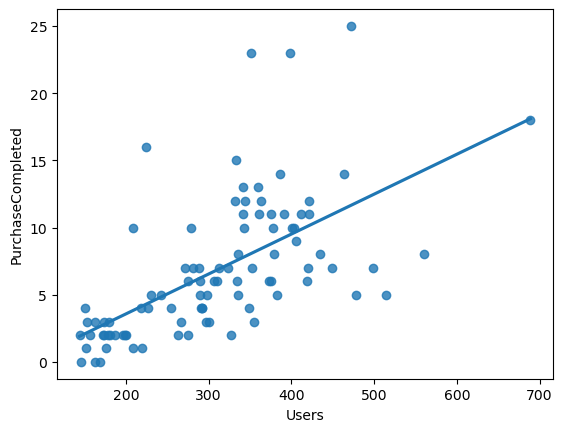

In [17]:
sns.regplot(data = webdata, x = "Users", y = "PurchaseCompleted", ci=None)
plt.show()

We could also have gotten the prediction on our data directly from the model object using the predict method.

In [18]:
linreg_model.predict()

array([14.2635974 ,  8.85864349,  9.86836016, 12.45204691,  8.76955085,
        2.74094842,  3.18641165, 10.076243  , 10.55140378,  8.88834104,
        9.00713124,  9.60108222,  2.47367047,  5.44342537, 18.09458121,
       10.96716947, 10.1356381 ,  8.76955085,  7.25497585,  2.80034351,
        2.94883126,  9.24471163, 10.1356381 ,  9.09622388,  8.41318026,
        5.97798125,  1.90941705,  2.80034351,  6.83921017,  8.71015575,
       12.89751015,  6.30465429,  6.27495674,  2.29548518,  2.14699744,
        4.46340625,  5.79979595,  4.81977684,  5.91858615,  9.66047731,
        2.11729989,  2.85973861,  6.92830281,  6.75011752,  8.08650722,
       11.82839838,  7.99741457,  2.47367047,  3.57247978,  7.61134644,
        7.78953173,  7.84892683,  6.45314203,  5.56221556,  2.65185577,
        3.00822636,  7.55195134,  6.24525919,  8.17559987,  7.3440685 ,
        4.37431361,  1.96881214,  2.17669499,  5.71070331, 10.10594055,
        9.54168712,  5.79979595,  6.24525919,  3.48338714,  3.83

We can verify that they are the same as our manually calculated predictions.

In [19]:
pred_test_df = pd.DataFrame({"PredictMethod": linreg_model.predict(), "ManuallyCalculated" : pred_y})
pred_test_df["Difference"] = pred_test_df["PredictMethod"] - pred_test_df["ManuallyCalculated"]
pred_test_df

,PredictMethod,ManuallyCalculated,Difference
0,14.263597,14.263597,1.776357e-15
1,8.858643,8.858643,0.000000e+00
2,9.868360,9.868360,0.000000e+00
3,12.452047,12.452047,0.000000e+00
4,8.769551,8.769551,0.000000e+00
...,...,...,...
87,8.056810,8.056810,0.000000e+00
88,9.452594,9.452594,0.000000e+00
89,3.839758,3.839758,4.440892e-16
90,4.285221,4.285221,0.000000e+00


In [20]:
sum(pred_test_df["Difference"])

1.0436096431476471e-14

Apparently there are some very small rounding errors somewhere, but they are not significant.

## Fitting simple linear regression using scikit-learn

We can also use the machine learning package [scikit-learn](https://scikit-learn.org/stable/) to fit a linear regression model (also using OLS). First we import the linear_model submodule.

In [21]:
from sklearn import linear_model

Then we define a linear regression mode.

In [22]:
linreg_model_sk = linear_model.LinearRegression()

For scikit-learn we do not need to have an intercept column explicitly in our X dataset. However, we still need to have it as a pandas dataframe. Thus we define a new X first.

In [23]:
X_no_int = webdata[["Users"]]
X_no_int

,Users
0,560
1,378
2,412
3,499
4,375
...,...
87,351
88,398
89,209
90,224


We can now fit the model.

In [24]:
linreg_model_sk.fit(X_no_int, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


There is no way of getting a form of model summary from Scikit-learn, however we can get he coefficient in scikit-learn will give us all the coefficient of the slop in the following way:

In [25]:
linreg_model_sk.coef_

array([0.02969755])

The coefficient of the intercept we have to get seperately by:

In [26]:
linreg_model_sk.intercept_

np.float64(-2.3670299993102395)

We see that we get the same value as for statsmodels OLS.

To get the prediction of the model, we can use the `.predict` method. Note that we have to give the method some X data to predict on. This is useful if one have trained the model on some  data and want to predict for some new data.

In [27]:
linreg_model_sk.predict(X_no_int)

array([14.2635974 ,  8.85864349,  9.86836016, 12.45204691,  8.76955085,
        2.74094842,  3.18641165, 10.076243  , 10.55140378,  8.88834104,
        9.00713124,  9.60108222,  2.47367047,  5.44342537, 18.09458121,
       10.96716947, 10.1356381 ,  8.76955085,  7.25497585,  2.80034351,
        2.94883126,  9.24471163, 10.1356381 ,  9.09622388,  8.41318026,
        5.97798125,  1.90941705,  2.80034351,  6.83921017,  8.71015575,
       12.89751015,  6.30465429,  6.27495674,  2.29548518,  2.14699744,
        4.46340625,  5.79979595,  4.81977684,  5.91858615,  9.66047731,
        2.11729989,  2.85973861,  6.92830281,  6.75011752,  8.08650722,
       11.82839838,  7.99741457,  2.47367047,  3.57247978,  7.61134644,
        7.78953173,  7.84892683,  6.45314203,  5.56221556,  2.65185577,
        3.00822636,  7.55195134,  6.24525919,  8.17559987,  7.3440685 ,
        4.37431361,  1.96881214,  2.17669499,  5.71070331, 10.10594055,
        9.54168712,  5.79979595,  6.24525919,  3.48338714,  3.83